# Workshop 9: Intro to NLP - Markov Chains 
#### Making Messages with Markov



## What are Markov Chains?

Simply put, Markov Chains are graphs like the one you see below! You have state nodes (the circles labeled 0, 1, 2) and transition edges (the arrows labeled 1). The defining feature of a Markov Chain is that the next state you visit is only dependent on your current state and whatever input you give it.

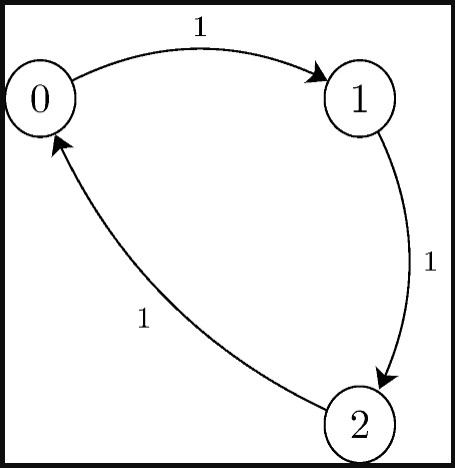

### A Common Example 

A problem you'll see often in Computer Science and Graphs is called the Weather Guessing Game. In the graph below, you'll see a few edges labeled with the percentage of the next day having that weather given the current day.
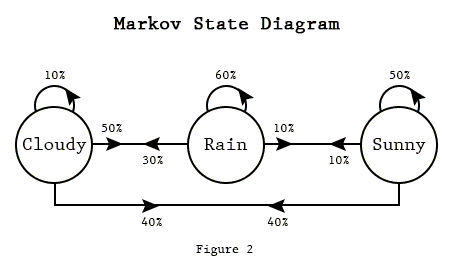

Moving towards the more math side of Markov Chains, we can represent this graph as an N x N matrix with N being the number of states. The filled in values are the probabilities we saw before.

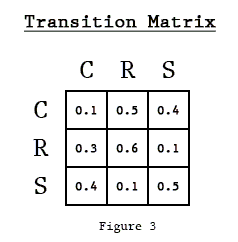

Say today is cloudy. We can represent this as a vector of the following form (Cloudy, Rainy, Sunny) --> (1, 0, 0). Given this, we can multiply it by our matrix to find the probability of it being Cloudy, Rainy, or Sunny the next day.

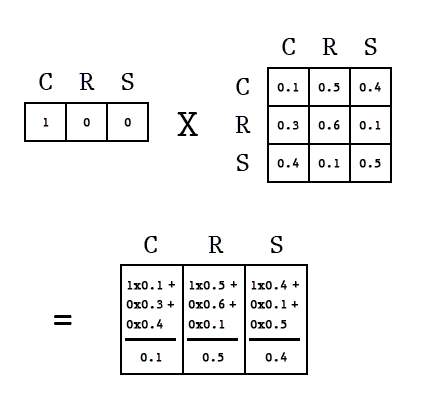

So if it's cloudy today, the probability of it being cloudy tomorrow is 0.1, the probability of rain is 0.5, the probability of sun is 0.4

Things get more interesting/complicated if you keep adding on more days and try predicting the chance of rain even further in the future!

## Okay but what's this have to do with NLP?

Glad you asked! Instead of the weather, what if we represented each node as a word and had the edges be the probability a word comes after another?

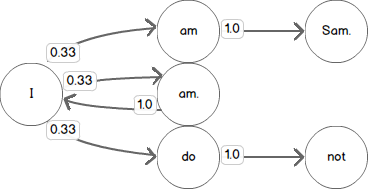

In the example above, we see a 1/3 probability of reaching "do" from "I", and then a 1.0 probability of reaching "not" from "do". 

So a few possible distinct sentences following along the states and edges are:

- I am Sam
- I do not
- I am. I am Sam
- I am. I am. I am. I am. I do not
- and so on...

So as long as you give your model a starting point, it can generate sentences!

##Conceptual Wrap-up:
That's really about it as far as Markov Chains go for text generation. They are by far one of the easiest ways to generate words/sentences but of course there are many more complicated and math heavy ways people have explored like Recurrent Neural Networks.

## Resources (we used or think are cool):

Stanford: [Markov Chains](https://nlp.stanford.edu/IR-book/html/htmledition/markov-chains-1.html)

Internet Tutorial: [Images we used](https://techeffigytutorials.blogspot.com/2015/01/markov-chains-explained.html)

TowardsDataScience: [Another Cool Tutorial](https://towardsdatascience.com/simulating-text-with-markov-chains-in-python-1a27e6d13fc6)

Wikipedia: [Hidden Markov Models!](https://en.wikipedia.org/wiki/Hidden_Markov_model)

TensorFlow: [Text Generation](https://www.tensorflow.org/tutorials/text/text_generation)

Medium: [Application of RNN](https://medium.com/phrasee/neural-text-generation-generating-text-using-conditional-language-models-a37b69c7cd4b)

UCLA: [Impact of Text Generation](http://dhbasecamp.humanities.ucla.edu/machinelearning/text-data/algorithms-of-text-generation-and-their-effects-on-society/)

Project Gutenberg! [Non-copyrighted Texts to use](https://www.gutenberg.org/)

[Markovify](https://github.com/jsvine/markovify): a library built for text generation using markov chains

UBC: [HMM](https://www.cs.ubc.ca/~murphyk/Bayes/rabiner.pdf)

#Heres an Example of Creating a Markov Chain in Python : 
- https://towardsdatascience.com/simulating-text-with-markov-chains-in-python-1a27e6d13fc6


In [1]:
!pip install markovify
import markovify
import requests
import numpy as np

# load in the text file
links = ["https://raw.githubusercontent.com/StrikingLoo/ASOIAF-Markov/master/books/got1.txt"]
corpus = ""
for link in links:
    data = requests.get(link).text
    corpus += data

# some data cleaning
corpus = corpus.replace('\n',' ')
corpus = corpus.replace('\t',' ')
corpus = corpus.replace('“', ' " ')
corpus = corpus.replace('”', ' " ')
for spaced in ['.','-',',','!','?','(','—',')']:
    corpus = corpus.replace(spaced, ' {0} '.format(spaced))

corpus = corpus.split()
len(corpus)

     |████████████████████████████████| 245kB 7.8MB/s 
  Created wheel for markovify: filename=markovify-0.8.3-cp36-none-any.whl size=18416 sha256=04757c1557402cb0c09911eb84b827b9fde3dfcfe3599ec0f7ba2b9f8bdf4d57
  Stored in directory: /root/.cache/pip/wheels/5e/e5/be/8e61715070048813947af5fb32f47b4cf9dddd37c965800bdb
Successfully built markovify


398555

In [2]:
corpus

['This',
 'edition',
 'contains',
 'the',
 'complete',
 'text',
 'of',
 'the',
 'original',
 'hardcover',
 'edition',
 '.',
 'NOT',
 'ONE',
 'WORD',
 'HAS',
 'BEEN',
 'OMITTED',
 '.',
 'A',
 'CLASH',
 'OF',
 'KINGS',
 'A',
 'Bantam',
 'Spectra',
 'Book',
 'PUBLISHING',
 'HISTORY',
 'Bantam',
 'Spectra',
 'hardcover',
 'edition',
 'published',
 'February',
 '1999',
 'Bantam',
 'Spectra',
 'paperback',
 'edition',
 '/',
 'September',
 '2000',
 'SPECTRA',
 'and',
 'the',
 'portrayal',
 'of',
 'a',
 'boxed',
 '"',
 's',
 '"',
 'are',
 'trademarks',
 'of',
 'Bantam',
 'Books',
 ',',
 'a',
 'division',
 'of',
 'Random',
 'House',
 ',',
 'Inc',
 '.',
 'All',
 'rights',
 'reserved',
 '.',
 'Copyright',
 '©',
 '1999',
 'by',
 'George',
 'R',
 '.',
 'R',
 '.',
 'Martin',
 '.',
 'Maps',
 'by',
 'James',
 'Sinclair',
 '.',
 'Heraldic',
 'crest',
 'by',
 'Virginia',
 'Norey',
 '.',
 'Library',
 'of',
 'Congress',
 'Catalog',
 'Card',
 'Number:',
 '98',
 '-',
 '37954',
 '.',
 'No',
 'part',
 'of',
 

In [4]:
def make_pairs(corpus):
    for i in range(len(corpus)-1):
        yield (corpus[i], corpus[i+1])
        
pairs = make_pairs(corpus)

word_dict = {}

for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]
 
first_word = np.random.choice(corpus)

while first_word.islower():
    first_word = np.random.choice(corpus)

chain = [first_word]

n_words = 50

for i in range(n_words):
    chain.append(np.random.choice(word_dict[chain[-1]]))

' '.join(chain)

'Tower screamed down to pray . " You will be saved Bran and howled , the grapes such fools spoon when the halls of red ox cart to challenge myself well . Tyrion could drive the echoes . " " " Tyrion scanned the iron spikes , Sansa emptied the maester'

### Other examples:
- https://github.com/StrikingLoo/ASOIAF-Markov/blob/master/ASOIAF.ipynb


## Another application: Hidden Markov Models and POS Tagging

NLTK is a massive and super popular library specifically for NLP related applications (stands for Natural Language ToolKit!).

A thing already built in NLTK is the hmm class, Hidden Markov Models. A use for hmm's are part-of-speech tagging.

Take the sentence "I eat chicken" as an example. The actual input we get are those three words, but we know there are "parts of speech" associated with each one of them. I is a personal pronoun, eat is a verb, and chicken is a noun. Our Markov Model never actually explicitly sees the personal pronoun, verb, and noun input, but it can still use this "hidden" notion in its predictions!

In [8]:
import nltk
import re 
nltk.download('brown')
nltk.download('tagsets')
from nltk import HiddenMarkovModelTrainer
from nltk import LidstoneProbDist

nltk.help.brown_tagset()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a

In [5]:
def load_pos(num_sents):
    from nltk.corpus import brown

    sentences = brown.tagged_sents(categories='news')[:num_sents]

    tag_re = re.compile(r'[*]|--|[^+*-]+')
    tag_set = set()
    symbols = set()
 
    cleaned_sentences = []
    for sentence in sentences:
        for i in range(len(sentence)):
            word, tag = sentence[i]
            word = word.lower() # normalize
            symbols.add(word) # log this word
            # Clean up the tag.
            tag = tag_re.match(tag).group()
            tag_set.add(tag)
            sentence[i] = (word, tag) # store cleaned-up tagged token
        cleaned_sentences += [sentence]
 
    return cleaned_sentences, list(tag_set), list(symbols)

In [6]:
def demo_pos(sentence):
    labelled_sequences, tag_set, symbols = load_pos(20000)
    
    trainer = HiddenMarkovModelTrainer(tag_set, symbols)
    hmm = trainer.train_supervised(labelled_sequences[10:],
    estimator=lambda fd, bins: LidstoneProbDist(fd, 0.1, bins))
 
    return hmm.tag(sentence.split())

In [10]:
demo_pos("Illinois sucks at Football")

[('Illinois', 'PPS'), ('sucks', 'VBD'), ('at', 'IN'), ('Football', 'AT')]

As a sidenote: NLTK has their own pos_tag() function that does the job pretty well already

## What is a Recurrent Neural Network?

RNN is a type of a Neural Network that can be described as a method that allows the user to generate a prediction model. RNN produces similar results to a Markov chain except for the fact that it is the opposite of markov chains which is memoryless. More specifically, the information cycles through a loop. When it makes a decision, it considers the current input and also what it has learned from the inputs it received previously.




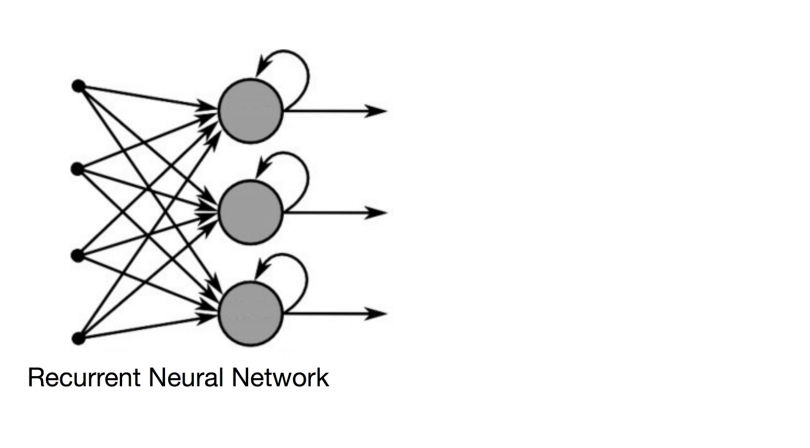

###Common Examples

RNN have many applications, for example it can be used for
- Language Modelling and Generating Text
- Speech Recognition
- Generating Image Descriptions
- Video Tagging
- Image Recognition

Additional Resources:

https://towardsdatascience.com/under-the-hood-of-neural-networks-part-2-recurrent-af091247ba78

https://medium.com/phrasee/neural-text-generation-generating-text-using-conditional-language-models-a37b69c7cd4b

https://medium.com/deep-math-machine-learning-ai/chapter-10-deepnlp-recurrent-neural-networks-with-math-c4a6846a50a2